# 귀펭 (귀여운 펭귄처럼) 미니 프로젝트
* 목적: 남부터미널 근처의 괜찮은 음식점 찾아보기
    * 학원 근처에 맛있는 음식점은 어디일까?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-학원-근처의-맛집-찾아보기" data-toc-modified-id="2.-학원-근처의-맛집-찾아보기-2">2. 학원 근처의 맛집 찾아보기</a></span><ul class="toc-item"><li><span><a href="#2.1.-부적합한-카테고리-제외하기" data-toc-modified-id="2.1.-부적합한-카테고리-제외하기-2.1">2.1. 부적합한 카테고리 제외하기</a></span></li><li><span><a href="#2.2.-학원-근처에는-어떤-카테고리의-음식이-많을까?" data-toc-modified-id="2.2.-학원-근처에는-어떤-카테고리의-음식이-많을까?-2.2">2.2. 학원 근처에는 어떤 카테고리의 음식이 많을까?</a></span></li><li><span><a href="#2.3.-학원-근처의-괜찮은-음식점은?" data-toc-modified-id="2.3.-학원-근처의-괜찮은-음식점은?-2.3">2.3. 학원 근처의 괜찮은 음식점은?</a></span><ul class="toc-item"><li><span><a href="#2.3.1-음식점-분포-살펴보기" data-toc-modified-id="2.3.1-음식점-분포-살펴보기-2.3.1">2.3.1 음식점 분포 살펴보기</a></span></li><li><span><a href="#2.3.2.-학원-근처,-괜찮은-음식점-찾아보기" data-toc-modified-id="2.3.2.-학원-근처,-괜찮은-음식점-찾아보기-2.3.2">2.3.2. 학원 근처, 괜찮은 음식점 찾아보기</a></span></li><li><span><a href="#2.3.3.-리뷰--분석해보기" data-toc-modified-id="2.3.3.-리뷰--분석해보기-2.3.3">2.3.3. 리뷰  분석해보기</a></span></li></ul></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from tqdm import tqdm_notebook

In [171]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [172]:
df = pd.read_csv('source/Restaurant_analysis_miniproject/restaurant_ZMS_200701.csv')

In [173]:
df.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,크래프트아일랜드 강남역점,"호프,요리주점",서초동 1317-32,4.8,173,292,37.498478,127.025597,1401.450583,100.00
1,크래버 대게나라 서초점,"게,대게",서초동 1582-16,4.8,166,101,37.486660,127.010803,870.179020,98.60
2,미즈컨테이너 강남웨스트점,양식,서초동 1316-29,3.4,603,354,37.498270,127.025215,1369.162723,88.51
3,영동족발 3호점,"족발,보쌈",양재동 1-8,3.5,410,105,37.484180,127.038309,1578.216483,85.02
4,마키노차야 역삼점,해산물뷔페,역삼동 824-46,3.6,322,210,37.498140,127.031071,1587.181976,84.38


In [174]:
df.shape

(1420, 10)

## 2. 학원 근처의 맛집 찾아보기
> 학원 다니면서 점심에 꼭 가봐야할 곳은?

* ZMS라는 지표를 통해 이제 어떤 음식점이 '괜찮은' 곳인지 알 수 있게 되었다.
    * ZMS = Zon Mat Score (원래 J이지만 Z로 바꿔보았다)
    * $ZMS = scaler\_0\_to\_100(score * log(eval\_cnt) + min\_max\_scaler(log(review\_cnt)))$
* 그러면 이제 학원 **'근처'의 기준**에 대해 정의해야한다.
    * 여름이라는 것을 감안할 때, **직선거리로 700m 이내인 곳**으로 한정하였다.
        * 직선거리로 700m는 **도보 기준 10분**

In [175]:
df.query('distance <= 700').shape

(166, 10)

* 총 1,420곳의 음식점 중, 166곳이 학원 반경 700m내에 있다.

In [176]:
df_700 = df.query('distance <= 700').reset_index(drop=True)
df_700.head(10)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713,74.12
1,우작설렁탕,설렁탕,서초동 1621-5,3.7,106,57,37.486157,127.016108,403.677869,69.81
2,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267,37.484014,127.017342,402.732947,68.46
3,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488994,127.013639,679.102070,65.32
4,레프레미스,"제과,베이커리",서초동 1430-1,4.1,48,93,37.484312,127.020627,243.059959,64.69
5,교대곱창,"곱창,막창",서초동 1578-3,3.0,159,161,37.488640,127.014238,614.892035,62.41
6,시골집,쌈밥,서울 서초구 반포대로10길 7,4.3,27,23,37.483737,127.012245,0.803824,57.25
7,삼보부대고기,"찌개,전골",서초1동 1443-27,4.1,22,16,37.485368,127.019386,168.767154,51.19
8,바른치킨 남부터미널점,치킨,서초동 1458-6,4.2,20,28,37.484206,127.013679,666.867820,51.15
9,국대떡볶이 서초남부점,떡볶이,서초동 1443-1,3.4,40,8,37.485151,127.018561,238.360402,50.30


* 가장 ZMS가 높은 곳은, 장꼬방이라는 음식점이다.
* 그런데, 루엘드파리, 거북곱창, 바른치킨 등의 카테고리를 살펴보면,
    * 제과, 곱창, 치킨으로 점심 식사를 하기에는 부적합하다.
    * ~~점심에 왜 곱창을 못 먹는데?~~
* 카테고리를 살펴보고, 점심에 먹기 부적합한 곳들은 제외하자.

### 2.1. 부적합한 카테고리 제외하기
* 점심으로 부적합한 카테고리를 제외하자.

In [177]:
df.category.unique()

array(['호프,요리주점', '게,대게', '양식', '족발,보쌈', '해산물뷔페', '순대', '곱창,막창', '일본식라면',
       '이탈리안', '찌개,전골', '초밥,롤', '두부전문점', '국수', '퓨전일식', '중화요리', '햄버거',
       '냉면', '한식', '설렁탕', '육류,고기', '해물,생선', '곰탕', '제과,베이커리', '굴,전복',
       '돈까스,우동', '닭요리', '카페', '멕시칸,브라질', '장어', '갈비', '치킨', '분식', '스테이크,립',
       '일식', '한정식', '삼계탕', '피자', '베트남음식', '동남아음식', '테마카페', '쌈밥', '커피전문점',
       '일본식주점', '떡볶이', '인도음식', '샤브샤브', '중식', '불고기,두루치기', '일식집', '고양이카페',
       '디저트카페', '참치회', '오리', '샌드위치', '퓨전한식', '복어', '칵테일바', '패밀리레스토랑',
       '국밥', '퓨전요리', '푸드코트', '양꼬치', '삼겹살', '실내포장마차', '회', '도시락', '도넛',
       '해장국', '매운탕,해물탕', '추어', '감자탕', '아구', '북카페', '한식뷔페', '수제비',
       '사철탕,영양탕', '와인바', '패스트푸드', '떡,한과', '조개', '죽', '생과일전문점', '해산물',
       '뷔페', '태국음식', '만화카페', '토스트', '아이스크림', '보드카페', '술집', '퓨전중식',
       '아시아음식', '닭강정', '오뎅바', '고기뷔페'], dtype=object)

In [178]:
not_lunch_cat = ['호프,요리주점', '술집', '실내포장마차', '일본식주점', '오뎅바', '와인바', '칵테일바',
                 '참치회', '조개', '회', '양꼬치', '치킨',   '닭강정', '곱창,막창', '고기뷔페', '육류,고기',
                 '떡,한과', '생과일전문점', '아이스크림', '디저트카페', '도넛', '만화카페', 
                 '커피전문점', '고양이카페', '테마카페', '카페', '보드카페', '북카페', '제과,베이커리', ]

In [179]:
df_700 = df_700.query("category not in @not_lunch_cat")
df_700.reset_index(inplace=True, drop=True)
df_700.shape

(93, 10)

* 108곳으로 줄어들었다.
* 아니 회를 왜 점심에 못먹어? 난 곱창 점심에도 먹는데! 라고 하실 수 있다.
    * 인정하고 많이 생각해봤는데, 그건 억지다.
    * 친구가 서초에 놀러와서 거긴 점심 뭐가 맛있어? 했는데
        * 교대곱창~ 이라고 하는 것은 좀 이상하지 않나?
* 어쩃든.. 학원 근처 best 맛집은 어디인지 추려보자.
    

### 2.2. 학원 근처에는 어떤 카테고리의 음식이 많을까?
* 실제 맛집을 찾기 전, 카테고리를 살펴보자.
* 내 눈에는 국밥밖에 없던디

In [180]:
df_700.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713,74.12
1,우작설렁탕,설렁탕,서초동 1621-5,3.7,106,57,37.486157,127.016108,403.677869,69.81
2,시골집,쌈밥,서울 서초구 반포대로10길 7,4.3,27,23,37.483737,127.012245,0.803824,57.25
3,삼보부대고기,"찌개,전골",서초1동 1443-27,4.1,22,16,37.485368,127.019386,168.767154,51.19
4,국대떡볶이 서초남부점,떡볶이,서초동 1443-1,3.4,40,8,37.485151,127.018561,238.360402,50.30


* 일단 상위 랭크된 음식점들의 카테고리를 보니, 한식이 많을 것 같다.
* 맞는지 확인해보자.

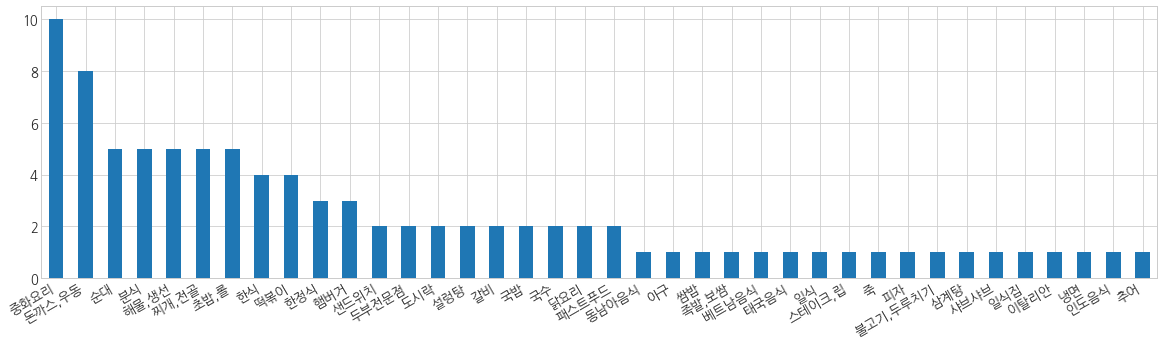

In [181]:
df_700.category.value_counts(ascending=False).plot('bar', figsize=(20, 5))
plt.xticks(rotation=30, ha='right')
plt.show()

* 의외로 중화요리가 제일 많다! 실제로 가본곳은 한 곳밖에 없는데! 몰랐다!
    * 그리도 돈까스집이 두 번째로 많고, 초밥집도 의외로 많다.
    * 초밥집도 두 군데밖에 못 봤는데!
* 중화요리집의 ZMS는 어떤지 살펴보자.

In [182]:
df_700_ch = df_700.query('category == "중화요리"')
df_700_ch

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
7,천지궁 서초점,중화요리,서초동 1589-8,3.5,28,23,37.485174,127.013142,679.771468,47.44
24,연화산,중화요리,서초동 1343-16,3.1,16,2,37.487185,127.026204,494.793723,34.23
29,명가교동짬뽕 서초점,중화요리,서초동 1599-2,3.0,13,4,37.486789,127.014534,541.772251,31.02
36,만다린,중화요리,서초동 1431-9,3.4,8,91,37.484176,127.021636,272.044145,30.29
52,황궁,중화요리,서초동 1601-1,2.8,10,9,37.486087,127.014473,548.085064,26.55
58,송쉐프 르쁘띠,중화요리,서초동 1577-6,4.3,4,18,37.489069,127.014051,649.645876,25.03
67,칭하이,중화요리,서초동 1443-25,2.3,9,25,37.485443,127.020136,126.228397,21.66
74,팔당반점 서초직영점,중화요리,서초동 1425-15,3.5,4,7,37.482749,127.019208,436.204545,20.18
81,강남짬뽕,중화요리,서초동 1602-10,2.0,9,24,37.485088,127.015821,455.070990,19.06
82,매화,중화요리,서초1동 1442-10,2.5,6,5,37.485338,127.021491,148.273532,18.56


* 10점대부터, 47점대까지 다양하게 분포되어있다.
* 점수만 봐서는 감이 한 번에 오지는 않는데,
    * 비교할만한 수치를 찾아보자.

In [183]:
# ZMS분포를 기준으로 특정 음식점이 몇%인지 알기 위한 그래프 그리기 함수 정의

# ZMS의 분포 그리기
def dist_zms():
    plt.figure(figsize=(20, 5))
    plt.xlim(0, 100)
    sns.distplot(df.ZMS)
    plt.title('Distribution ZMS', pad=40)
    plt.xlabel('')
# 분포에 음식점 추가하기
def add_zms(name):
    index_ = df[df.name==name].index[0]
    zms_ = df.iloc[index_, 9]

    plt.axvline(x=zms_, color='r', ls='--')
    plt.text(zms_, 0.04, str(round((index_+1)/len(df)*100,2))+'%', rotation=20)
    plt.text(zms_-1, -0.001*len(name), name, rotation=-30)


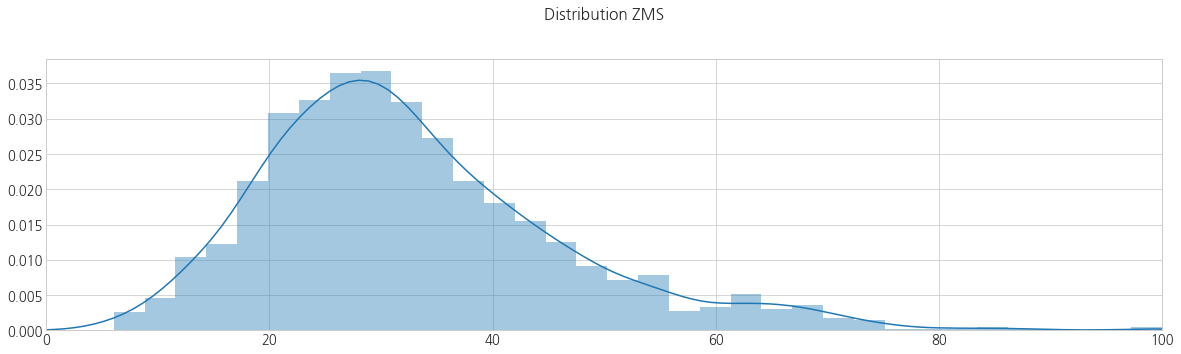

In [184]:
dist_zms()

* ZMS점수가 오른쪽으로 긴 꼬리 분포를 그리고 있으므로,
* 평균을 사용하면 엄격한 기준이 될 것 같다.
* 중앙값을 한번 구해보자.

In [185]:
print('평균: {:.2f}, 중앙값: {:.2f}'.format(df.ZMS.mean(), df.ZMS.median()))

평균: 32.78, 중앙값: 30.46


* 중앙값은 약 30점이다.
* ZMS가 30점보다 높은 음식점은 '괜찮은' 음식점일 가능성이 높다.
* 이제 다시 중화요리 카테고리로 돌아와서, 30점보다 높은 곳은 어디인지 살펴보자.

In [186]:
median_ZMS = df.ZMS.median()
df_700_ch_good = df_700_ch.query('ZMS > @median_ZMS')
df_700_ch_good

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
7,천지궁 서초점,중화요리,서초동 1589-8,3.5,28,23,37.485174,127.013142,679.771468,47.44
24,연화산,중화요리,서초동 1343-16,3.1,16,2,37.487185,127.026204,494.793723,34.23
29,명가교동짬뽕 서초점,중화요리,서초동 1599-2,3.0,13,4,37.486789,127.014534,541.772251,31.02


* 총 10곳 중, 괜찮다고 할 만한 곳은 총 3곳이다.
* 이 음식점들은 전체 식당 중 몇%인지 살펴보자.

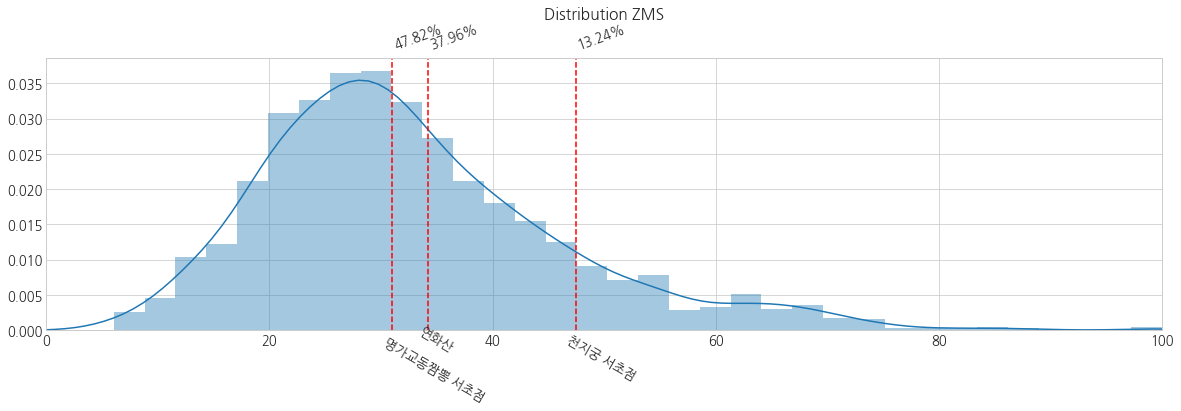

In [187]:
dist_zms()
for ch in df_700_ch_good.name:
    add_zms(ch)

* 천지궁은 상위 13% 음식점이고, 연화산과 교동짬뽕은 각각 38%, 48%로 중간 이상 정도의 음식점이다.
* 이제 이 음식점들이 어디에 위치해있는지 지도에 표시해보자.

In [256]:
def aca_map(zoom=16, marker=True, circle=True):
    aca_geo = (37.486498, 127.020663)
    m = folium.Map(aca_geo, zoom_start=zoom)
    if marker:
        folium.Marker(aca_geo,  icon=folium.Icon(
            color='gray', icon='glyphicon glyphicon-flag')).add_to(m)
    if circle:
        folium.Circle(aca_geo, radius=700, color='',
              fill_color='gray', fill_opacity=.3).add_to(m)
    return m

m = aca_map()

for i in df_700_ch_good.index:
    lat = df_700_ch_good.loc[i, 'lat']
    lng = df_700_ch_good.loc[i, 'lng']
    name = df_700_ch_good.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='red', icon='heart-empty'), popup=name).add_to(m)
m


* *안타깝게도 folium에서 utf-8 인코딩이 되지 않아서, 한글 마커가 제대로 뜨지 않는다.*
* 학원 남부터미널 부근과 학원 기준 오른쪽에 중화음식점이 위치하고있다!
* 10분 내외로 갈 수 있기때문에, 중화요리가 먹고싶은 날에는 학원 오른쪽에 있는 천지궁에 가보도록 하자.

### 2.3. 학원 근처의 괜찮은 음식점은?
* 이제 학원 커리큘럼이 끝나기 전, 꼭 가봐야할 음식점을 찾아보자.
* 그리고 그 음식점들의 리뷰를 분석하여, 실제로 어떤 평가를 받았는지 알아보자.

#### 2.3.1 음식점 분포 살펴보기
* 먼저, 학원 근처, 어느 곳에 음식점이 몰려있는지 알아보자.

In [259]:
from folium.plugins import HeatMap
m = aca_map()
HeatMap(df_700[['lat', 'lng']], radius=20).add_to(m)
m

* 계산상의 오류일 것 같은데, 700m를 넘어가는 곳이 몇몇 곳 존재한다.
* 확실히 남부터미널역 부근에 많이 분포되어있다.

#### 2.3.2. 학원 근처, 괜찮은 음식점 찾아보기
* 먼저 학원 근처 top20 음식점을 찾아보고,
* 괜찮은 음식점은 어느 곳이 있는지 분석해보자.

In [261]:
for i in df_700[:20].index:
    lat = df_700[:20].loc[i, 'lat']
    lng = df_700[:20].loc[i, 'lng']
    name = df_700[:20].loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='red', icon='heart-empty'), popup=name).add_to(m)
m

* 터미널 부근에 몰려있는 것을 알 수 있다.
* 몇 곳은 학원에서 길만 건너면 도착할 수 있다.
* top20곳의 ZMS 분포를 확인해보자.

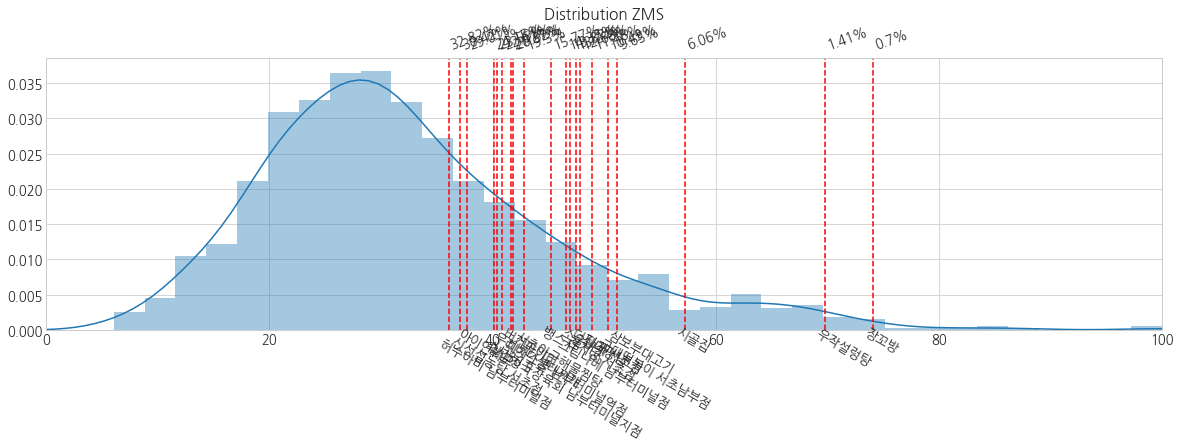

In [262]:
dist_zms()
for ch in df_700[:20].name:
    add_zms(ch)

In [263]:
df_700.head(20)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713,74.12
1,우작설렁탕,설렁탕,서초동 1621-5,3.7,106,57,37.486157,127.016108,403.677869,69.81
2,시골집,쌈밥,서울 서초구 반포대로10길 7,4.3,27,23,37.483737,127.012245,0.803824,57.25
3,삼보부대고기,"찌개,전골",서초1동 1443-27,4.1,22,16,37.485368,127.019386,168.767154,51.19
4,국대떡볶이 서초남부점,떡볶이,서초동 1443-1,3.4,40,8,37.485151,127.018561,238.360402,50.30
5,타지 서초점,인도음식,서초동 1444-21,3.7,26,22,37.484041,127.019181,302.915028,48.95
6,더진미평냉,냉면,서초동 1623-3,4.5,14,11,37.487126,127.015581,453.808097,47.87
7,천지궁 서초점,중화요리,서초동 1589-8,3.5,28,23,37.485174,127.013142,679.771468,47.44
8,소울버킷,햄버거,서초동 1578-4,4.6,12,49,37.488456,127.014277,604.102467,46.97
9,그림나베 남부터미널점,일식,서초동 1603-1,3.7,21,81,37.485729,127.016096,411.971397,46.61


* 모두 상위 30% 이상에 속한다.
    * 평균 이상일 것으로 예상되나, 정말 '괜찮을지'는 아직 장담할 수 없다.
* 기준을 조금 더 엄격하게 설정해보자.
* 전체 분포에서, 상위 20%보다 ZMS가 높은 곳들을 추려보자.

In [264]:
ZMS_20 = df.ZMS.quantile(.8)
ZMS_20

42.468

In [268]:
df_700_good = df_700[df_700.ZMS > ZMS_20]
df_700_good

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713,74.12
1,우작설렁탕,설렁탕,서초동 1621-5,3.7,106,57,37.486157,127.016108,403.677869,69.81
2,시골집,쌈밥,서울 서초구 반포대로10길 7,4.3,27,23,37.483737,127.012245,0.803824,57.25
3,삼보부대고기,"찌개,전골",서초1동 1443-27,4.1,22,16,37.485368,127.019386,168.767154,51.19
4,국대떡볶이 서초남부점,떡볶이,서초동 1443-1,3.4,40,8,37.485151,127.018561,238.360402,50.30
5,타지 서초점,인도음식,서초동 1444-21,3.7,26,22,37.484041,127.019181,302.915028,48.95
6,더진미평냉,냉면,서초동 1623-3,4.5,14,11,37.487126,127.015581,453.808097,47.87
7,천지궁 서초점,중화요리,서초동 1589-8,3.5,28,23,37.485174,127.013142,679.771468,47.44
8,소울버킷,햄버거,서초동 1578-4,4.6,12,49,37.488456,127.014277,604.102467,46.97
9,그림나베 남부터미널점,일식,서초동 1603-1,3.7,21,81,37.485729,127.016096,411.971397,46.61


* 학원 근처에서 상위 20%에 해당하는 음식점은 총 12곳이 있다!
* 이 음식점들의 ZMS분포를 살펴보자.

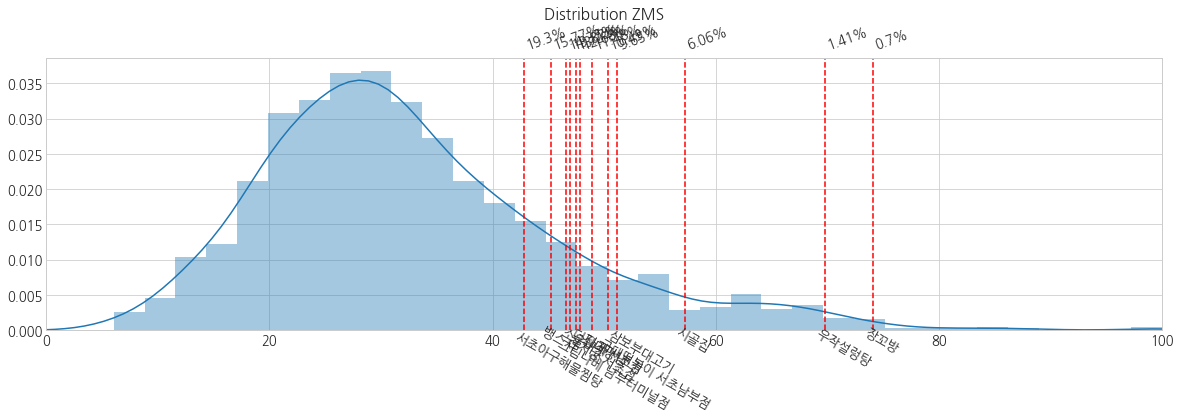

In [270]:
dist_zms()
for name in df_700_good.name:
    add_zms(name)

* 장꼬방이 상위 0.7%로 가장 점수가 높고, 우작설렁탕, 시골집도 10%안쪽으로 상위권이다.
* 그리고 나머지 음식점들은 10~20% 안팎에 몰려있는 것을 볼 수 있다.
* 이제 이 음식점들이 어디에 있는지 살펴보자.

In [278]:
m = aca_map()
for i in df_700_good[:3].index:
    lat = df_700_good.loc[i, 'lat']
    lng = df_700_good.loc[i, 'lng']
    name = df_700_good.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='red', icon='heart-empty'), popup=name).add_to(m)

for i in df_700_good[3:].index:
    lat = df_700_good.loc[i, 'lat']
    lng = df_700_good.loc[i, 'lng']
    name = df_700_good.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='orange', icon='heart-empty'), popup=name).add_to(m)
m

* top3는 빨간색으로, 나머지는 주황색으로 마커를 표시했다.
* 학원 커리큘럼이 끝나기 전에, 빨간 곳 3곳은 꼭 가보고,
* 여유가 된다면 나머지 주황색 음식점들도 모두 가보자.

#### 2.3.3. 리뷰  분석해보기
* 가장 좋은 평가를 받은 곳은 장꼬방, 그 다음은 우작설렁탕이었다.
* 이 두 곳의 리뷰를 분석하여, 
    * 별점의 변화를 알아보고
    * 어떤 리뷰들이 많이 달렸는지 확인해보자.

In [281]:
df_700.head(2)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713,74.12
1,우작설렁탕,설렁탕,서초동 1621-5,3.7,106,57,37.486157,127.016108,403.677869,69.81
